<h1>Week 3

<h1> Part E

Module 9 Lab

Web-based Data Visualization

a. Creating scatter plots

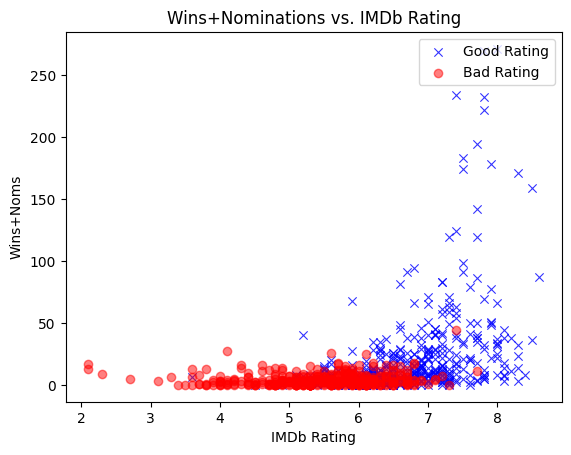

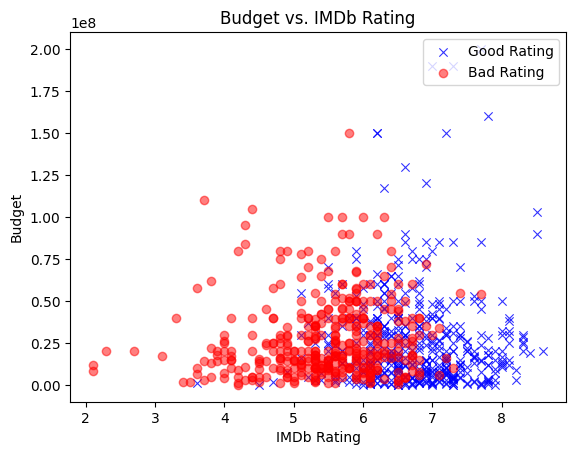

In [7]:
# 1. Create two scatter plots

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('movies.csv')

# boolean filters to seperate classes
good = df["IsGoodRating"] == 1
bad  = df["IsGoodRating"] == 0

# wins+nominations vs imdb rating
plt.figure()

# good movies - blue crosses
plt.scatter(df.loc[good, "imdbRating"],
            df.loc[good, "WinsNoms"],
            color="blue",
            marker="x",
            linewidths=0.8,
            alpha=0.8,
            label="Good Rating")

# bad movies - red circles
plt.scatter(df.loc[bad, "imdbRating"],
            df.loc[bad, "WinsNoms"],
            color="red",
            marker="o",
            linewidths=1,
            alpha=0.5,
            label="Bad Rating")

plt.title("Wins+Nominations vs. IMDb Rating")
plt.xlabel("IMDb Rating")
plt.ylabel("Wins+Noms")
plt.legend(loc="upper right")

plt.show()

# budget vs imdb rating
plt.figure()

# good movies - blue crosses
plt.scatter(df.loc[good, "imdbRating"],
            df.loc[good, "Budget"],
            color="blue",
            marker="x",
            linewidths=0.8,
            alpha=0.8,
            label="Good Rating")

# bad movies - red circles
plt.scatter(df.loc[bad, "imdbRating"],
            df.loc[bad, "Budget"],
            color="red",
            marker="o",
            linewidths=1,
            alpha=0.5,
            label="Bad Rating")

plt.title("Budget vs. IMDb Rating")
plt.xlabel("IMDb Rating")
plt.ylabel("Budget")
plt.legend(loc="upper right")

plt.show()

An issue I encountered was all of the plots merging with each other because everything was solid. To fix this, I added linewidth to thin the lines and alpha to reduce the opacity, so you could see different plots and they didn't merge together.

2. Discuss which feature combination is better at seperating classes

The feature combination Wins+Nominations vs IMDb rating is better at seperating the classes. The scatter plot shows a clear horizontal seperation around IMDb rating of around 6, where most good movies are to the right and most bad movies are to the left. Higher numbers of wins and nominations are almost always associated with good-rateed movies, which strenghtens the seperation in the upper right region of the plot.

b. Scaling symbol sizes

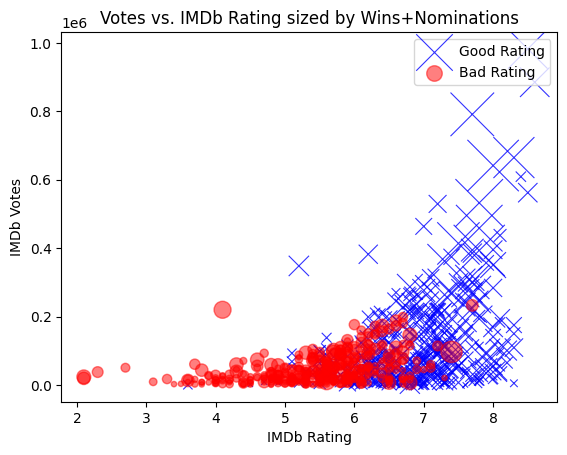

In [12]:
# scale symbol sizes based on wins+nominations

size_scale = 5 # good scale constant for visual appearence
sizes = df["WinsNoms"] * size_scale + 15  # +15 ensures zero values visible

# votes vs imdb rating
# good movies
plt.scatter(df.loc[good, "imdbRating"],
            df.loc[good, "imdbVotes"],
            s=sizes[good],
            color="blue",
            marker="x",
            linewidths=0.8,
            alpha=0.8,
            label="Good Rating")

# bad movies
plt.scatter(df.loc[bad, "imdbRating"],
            df.loc[bad, "imdbVotes"],
            s=sizes[bad],
            color="red",
            marker="o",
            linewidths=1,
            alpha=0.5,
            label="Bad Rating")

plt.title("Votes vs. IMDb Rating sized by Wins+Nominations")
plt.xlabel("IMDb Rating")
plt.ylabel("IMDb Votes")
plt.legend(loc="upper right")

plt.show()

c. Axis scales in D3

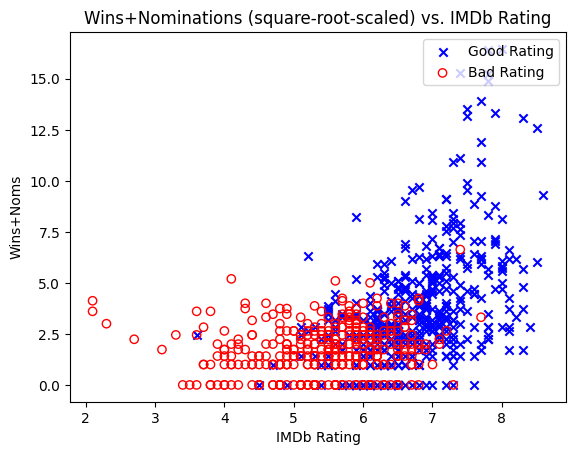

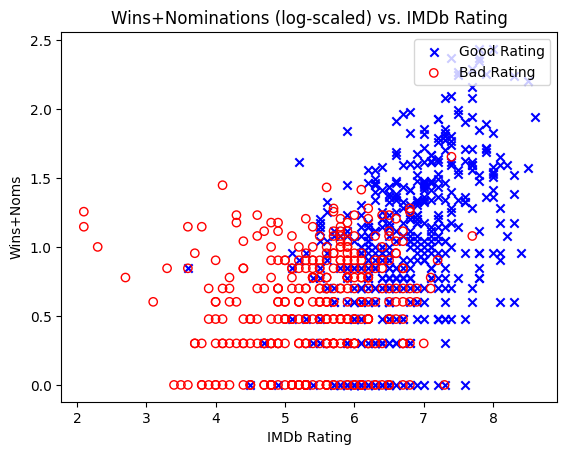

In [17]:
# first plot - square root scale for its y-axis
import numpy as np

# square root transform of wins+nominations
plt.scatter(df.loc[good, "imdbRating"],
            np.sqrt(df.loc[good, "WinsNoms"]),
            color="blue",
            marker="x",
            label="Good Rating")

plt.scatter(df.loc[bad, "imdbRating"],
            np.sqrt(df.loc[bad, "WinsNoms"]),
            facecolors="none",
            edgecolors="red",
            marker="o",
            label="Bad Rating")

plt.title("Wins+Nominations (square-root-scaled) vs. IMDb Rating")
plt.xlabel("IMDb Rating")
plt.ylabel("Wins+Noms")

plt.legend(loc="upper right")
plt.show()

# second plot - log scale for y-axis
plt.figure()

# log transform - add 1 to avoid log(0)
plt.scatter(df.loc[good, "imdbRating"],
            np.log10(df.loc[good, "WinsNoms"] + 1),
            color="blue",
            marker="x",
            label="Good Rating")

plt.scatter(df.loc[bad, "imdbRating"],
            np.log10(df.loc[bad, "WinsNoms"] + 1),
            facecolors="none",
            edgecolors="red",
            marker="o",
            label="Bad Rating")

plt.title("Wins+Nominations (log-scaled) vs. IMDb Rating")
plt.xlabel("IMDb Rating")
plt.ylabel("Wins+Noms")

plt.legend(loc="upper right")
plt.show()

Explanation

Square root scales are useful in charts when values vary moderately and we want to reduce the visual dominace of large values, while also making sure the zero values show. Log scales are useful in charts when the data spans multiple orders of magnitide, so it compresses large values and improves the visibility of the smaller ones. The plots with the scales are much easier to read than the first plots because of the visual appearence they added.